<a href="https://colab.research.google.com/github/chryslersolvalan/OBISIP/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<ipython-input-2-7c734c43cc08>:50: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 100.0


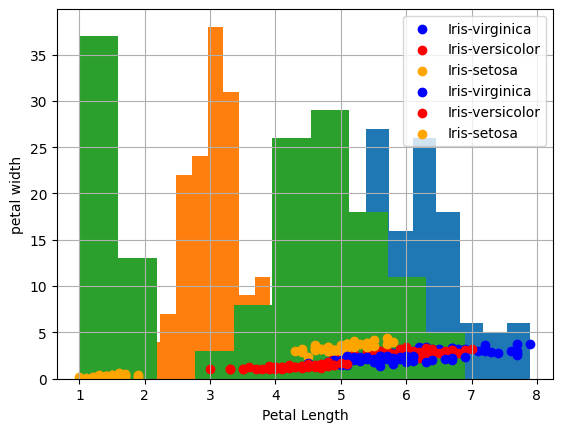

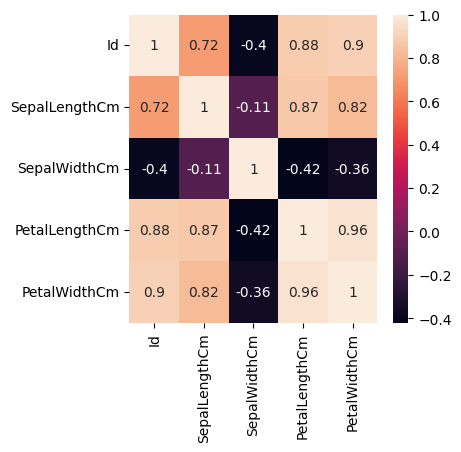

In [ ]:
#**Importing Modules for reading data set and to train models**

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

#**Loading dataset for traning the models and to read**

df = pd.read_csv('Iris.csv')
df.head()

df.describe()

df.info()

#**Preprocessing the data set by filling the null values**

df.isnull().sum()

#Data Analysis in the form of graph

df['SepalLengthCm'].hist()

df['SepalWidthCm'].hist()

df['PetalLengthCm'].hist()

colors = ['blue', 'red', 'orange']
species = ['Iris-virginica', 'Iris-versicolor','Iris-setosa']

for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c =colors[i], label = species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal width")
  plt.legend()

for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c =colors[i], label = species[i])
  plt.xlabel("Petal Length")
  plt.ylabel("petal width")
  plt.legend()

#Corr-Matrix shows Correlation Coefficients between Variables


corr=df.corr()
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(corr, annot=True, ax=ax)

#Label Encoder - Converting the labels into numeric form - Convert into Machine Readable Form

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species']= le.fit_transform(df['Species'])
df.head()

#Traning the model

from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

#Using Logistic Regression it is classification model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

#Testing the Accuracy of the model

print("Accuracy:",model.score(x_test, y_test)*100)